# 시계열 데이터 탐색 모듈

시계열 분석 전 데이터를 검정 절차를 일괄처리할 수 있도록 모듈화 한 기능

## #01. 패키지 참조

In [1]:
from pandas import read_excel
from matplotlib import pyplot as plt
import sys
import os
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import exp_time_data

## #02. 데이터 가져오기

In [2]:
df = read_excel("https://data.hossam.kr/E06/air_passengers.xlsx", index_col="Month")
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## #03. 검정 수행

결측치 수: 0


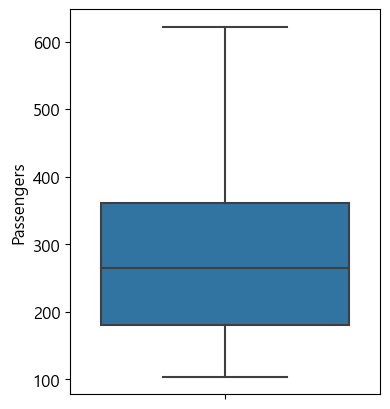

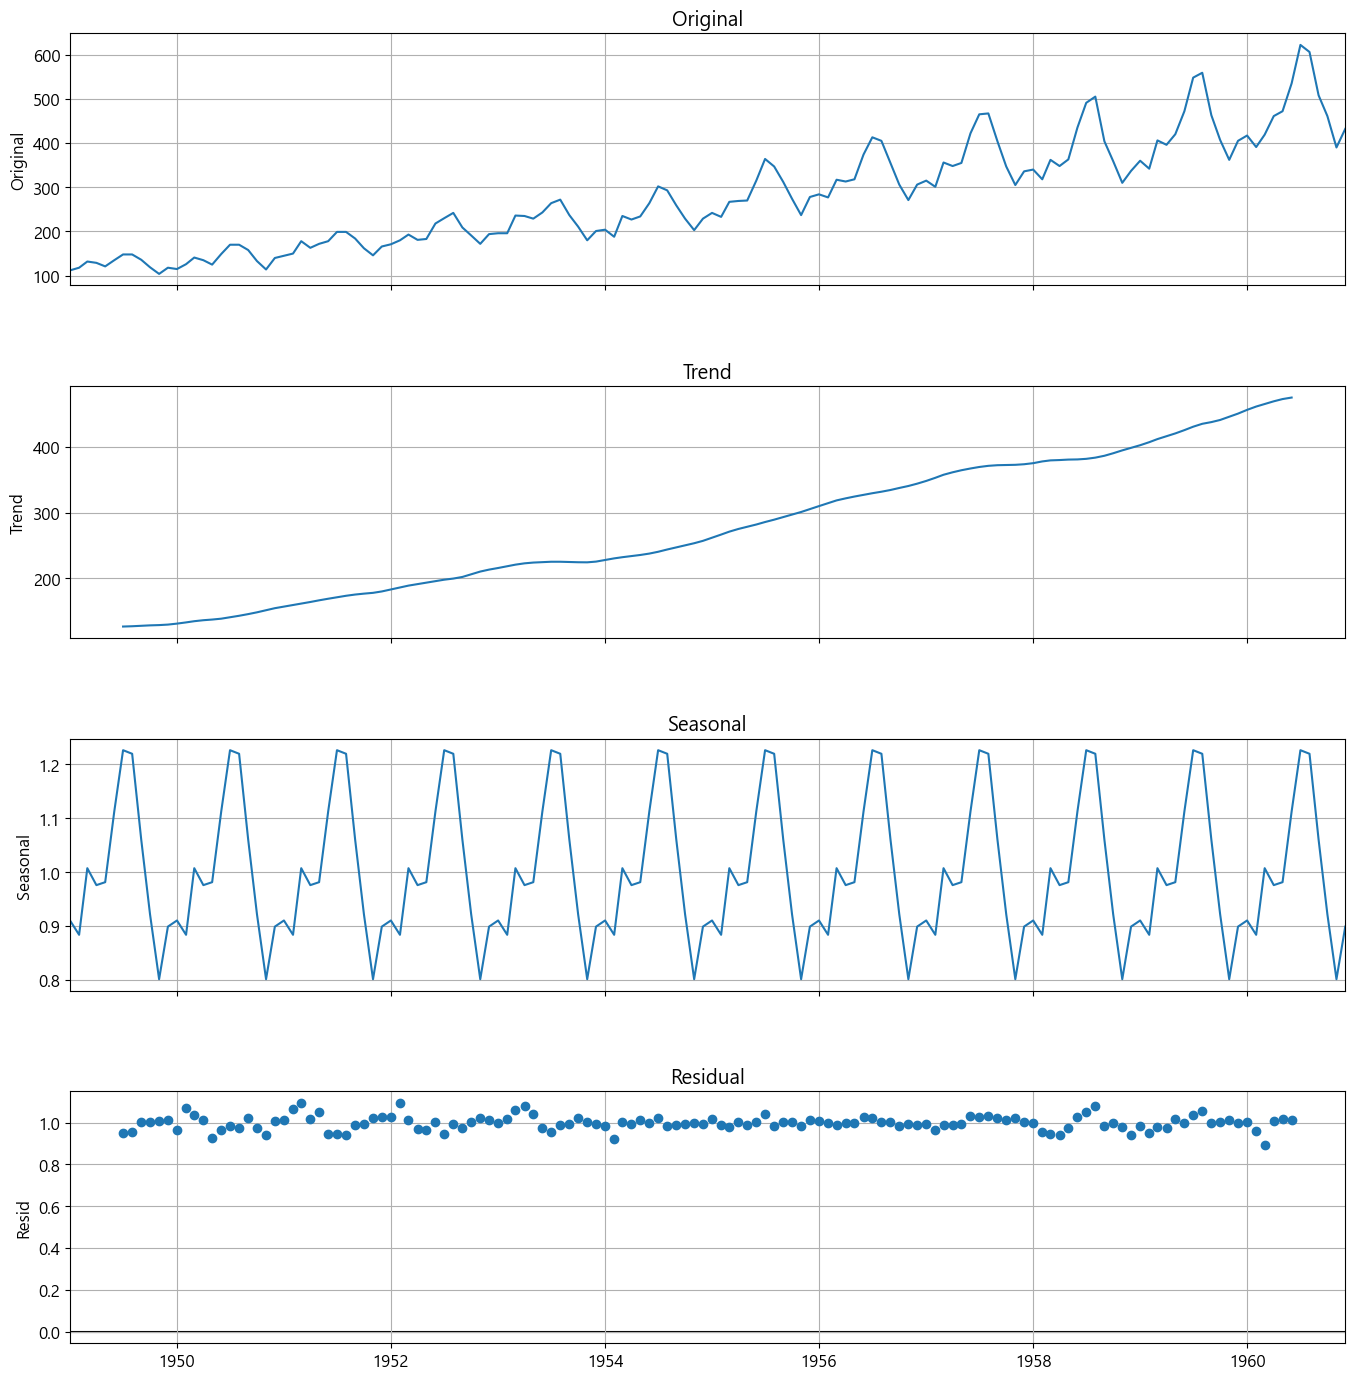

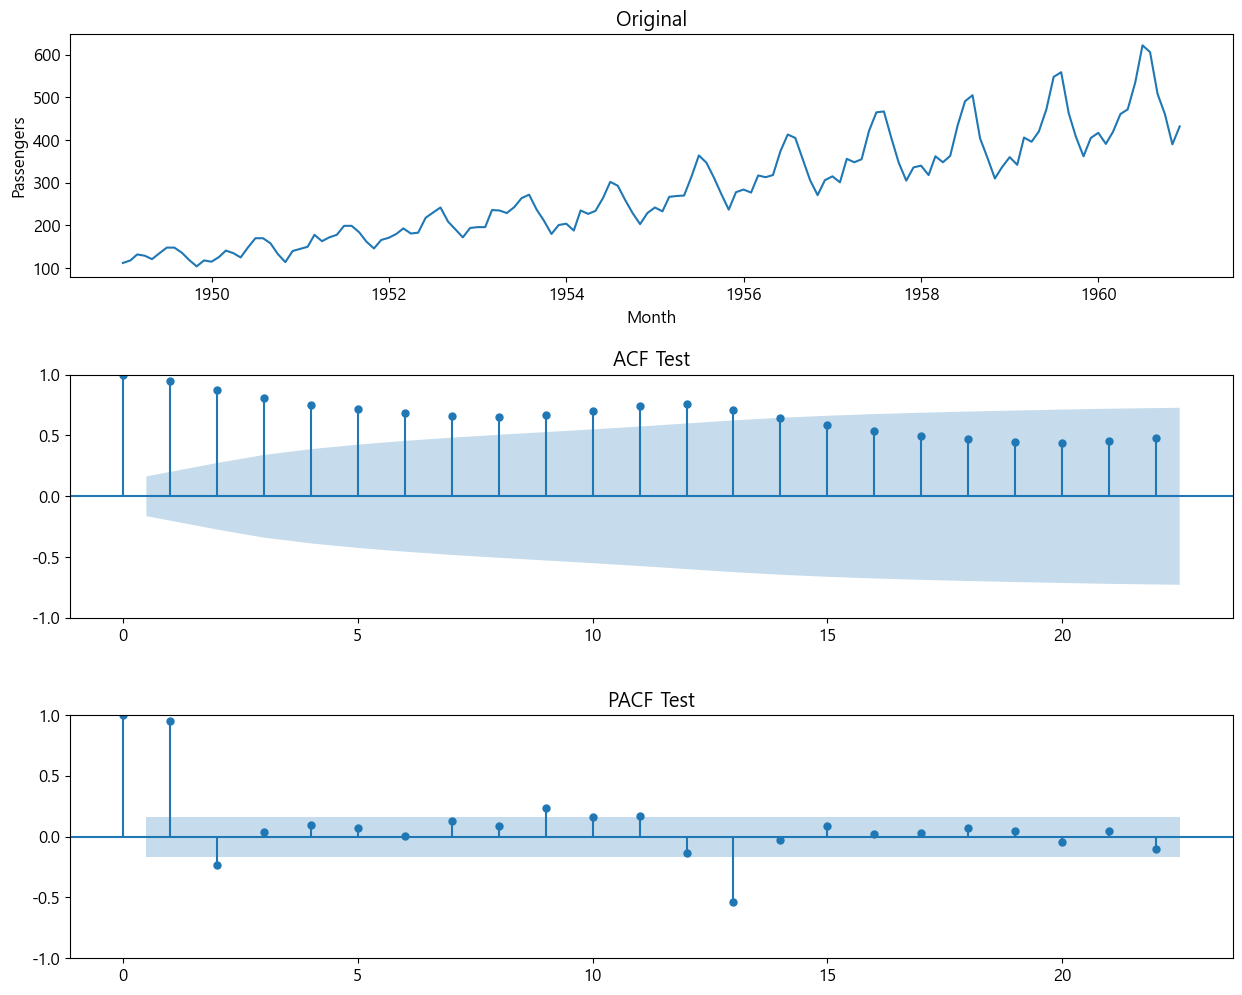

=========== 원본 데이터 ===========
+------------------------------------+----------+
| ADF Test                           |          |
|------------------------------------+----------|
| 검정통계량(ADF Statistic)          | 0.815369 |
| 유의수준(p-value)                  |  0.99188 |
| 최적차수(num of lags)              |       13 |
| 관측치 개수(num of observations)   |      130 |
| 기각값(Critical Values) 1%         | -3.48168 |
| 기각값(Critical Values) 5%         | -2.88404 |
| 기각값(Critical Values) 10%        | -2.57877 |
| 데이터 정상성 여부(0=False,1=True) |        0 |
+------------------------------------+----------+
=========== 1차 차분 데이터 ===========
+------------------------------------+-----------+
| ADF Test                           |           |
|------------------------------------+-----------|
| 검정통계량(ADF Statistic)          |  -2.82927 |
| 유의수준(p-value)                  | 0.0542133 |
| 최적차수(num of lags)              |        12 |
| 관측치 개수(num of observations)   |       130 |
| 기각값(Critical Values) 1%      

In [3]:
exp_time_data(df, 'Passengers', "m", max_diff=10)

# ACF, PACF 검정

| 구분 | $AR(p)$ 모델 적합 | $MA(q)$ 모델 적합 |
|---|---|---|
| ACF plot | 천천히 감소 | 첫 값으로부터 $q$개 뒤에 끊긴다. |
| PACF plot | 첫 값으로부터 $p$개 뒤에 끊긴다. | 천천히 감소 |

`추가` - 쉬운 설명
| 구분 | ACF plot | PACF plot |
|---|---|---|
| 감소 | 상대적으로 완만 | 상대적으로 급격 |
| 파란박스 진입 지점 | $p=1$ | $q=1$ |
| 적합 모델 | $AR(p)$ 모델 적합 | $MA(q)$ 모델 적합 |